In [101]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sys import stdout

### Hỗn hợp

In [102]:
honhop_folder = "data2/Honhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]
honhop_deriv = savgol_filter(honhop.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
honhop.iloc[:, :-2] = honhop_deriv

### Rễ

In [103]:
re_folder = "data2/Re"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(re_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(re_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
re = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
re.columns = ['_'.join(map(str, col)) for col in re.columns]
re["File name"] = file_names
re["Type"] = re["File name"].str.split("-", expand=True)[0].str[0]
re_deriv = savgol_filter(re.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
re.iloc[:, :-2] = re_deriv

### Thân

In [104]:
than_folder = "data2/Than"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(than_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(than_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
than = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
than.columns = ['_'.join(map(str, col)) for col in than.columns]
than["File name"] = file_names
than["Type"] = than["File name"].str.split("-", expand=True)[0].str[0]
than_deriv = savgol_filter(than.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
than.iloc[:, :-2] = than_deriv

In [105]:
data = pd.concat([honhop, re, than], axis=0)
data.shape

(119, 1871)

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Type"])

In [107]:
X = data.iloc[:, :-2]
wl = X.columns

In [108]:
wl_c = [float(i) for i in list(wl)]


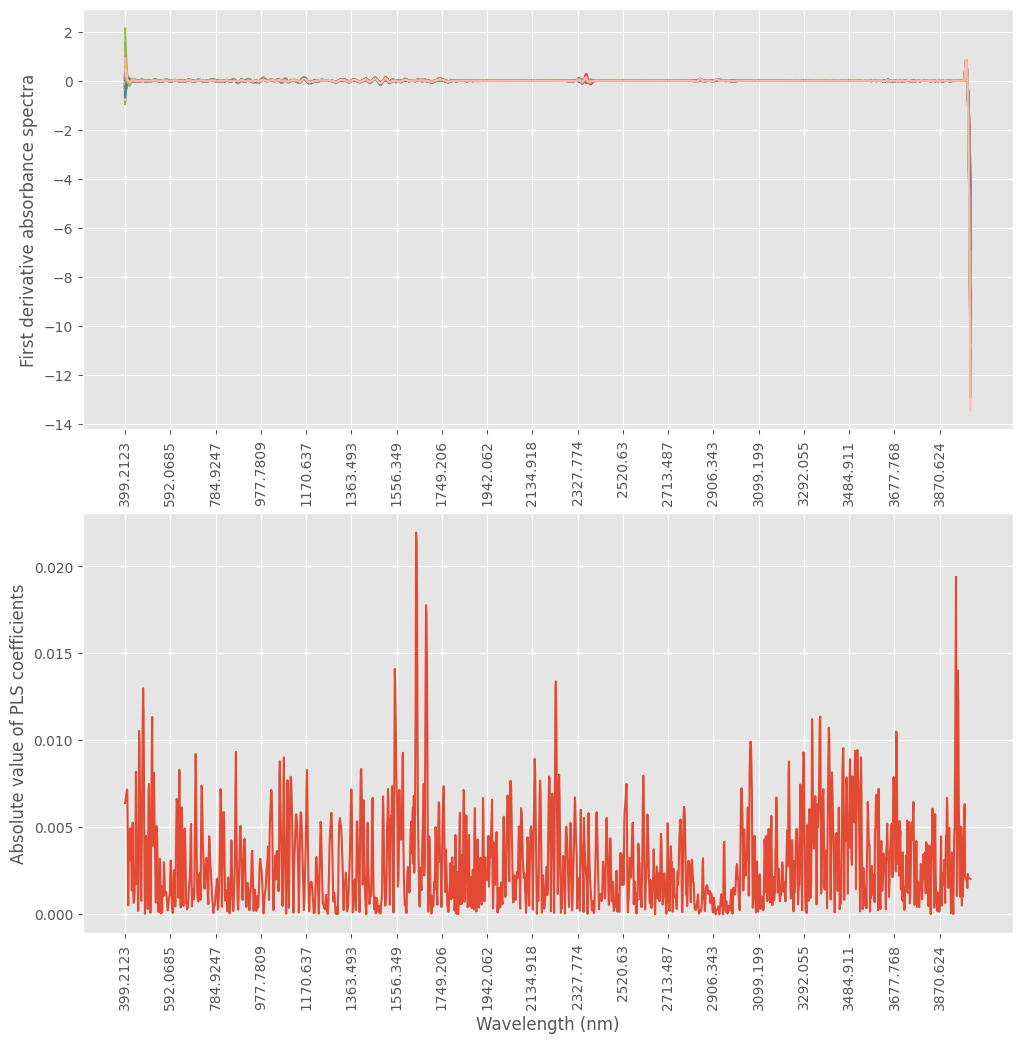

In [109]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(8)
pls.fit(X, y)


# print(np.abs(pls.coef_)reshape(-1,1))
plt.figure(figsize=(12,12))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(211)
    plt.plot(wl, X.T)
    plt.ylabel('First derivative absorbance spectra')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(wl, np.abs(pls.coef_).reshape(-1,1))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute value of PLS coefficients')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    plt.show()

In [110]:
# Open the file in binary mode 
with open('file.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    params = pickle.load(file) 
  
    print(params) 
sorted_ind = params['sorted_ind']
wav = params['wav']

{'wav': 1545, 'sorted_ind': array([ 961, 1273,  278, ...,  638,  639,  640], dtype=int64)}


C:\Users\84866\AppData\Local\Temp\ipykernel_19424\2458130111.py:13: MatplotlibDeprecationWarning:

The span_where function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use fill_between instead.

C:\Users\84866\AppData\Local\Temp\ipykernel_19424\2458130111.py:13: MatplotlibDeprecationWarning:

The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.



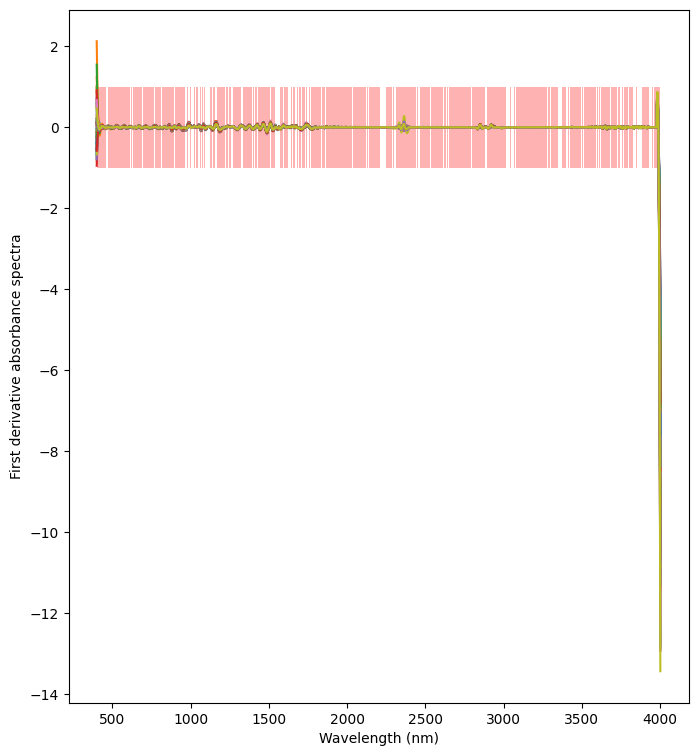

In [111]:
# Get a boolean array according to the indices that are being discarded
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])
 
import matplotlib.collections as collections
 
# Plot spectra with superimpose selected bands
fig, ax = plt.subplots(figsize=(8,9))
with plt.style.context(('ggplot')):
    ax.plot(wl_c, X.T)
    plt.ylabel('First derivative absorbance spectra')
    plt.xlabel('Wavelength (nm)')
 
collection = collections.BrokenBarHCollection.span_where(
    wl_c, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)
 
plt.show()

In [112]:
honhop_folder = "data2/testHonhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]
honhop_deriv = savgol_filter(honhop.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
honhop.iloc[:, :-2] = honhop_deriv

In [113]:
# Open the file in binary mode 
with open('file.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    params = pickle.load(file) 
  
    print(params) 
sorted_ind = params['sorted_ind']
wav = params['wav']

{'wav': 1545, 'sorted_ind': array([ 961, 1273,  278, ...,  638,  639,  640], dtype=int64)}


In [114]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X = honhop.iloc[:, :-2].values
X = X[:,sorted_ind][:, wav:]
X_scaled = scaler.transform(X)
clf2.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1])

In [117]:
X_lda = scaler.transform(data.iloc[:, :-2].values[:,sorted_ind][:, wav:])
X_lda = clf2.transform(X_lda)
print(X_lda)

[[-185.03687904 -265.22697628]
 [-292.19219593 -276.45597104]
 [-106.07942283 -316.25528762]
 [-354.28230747 -406.01442392]
 [-354.66257268 -404.14133942]
 [-180.4379486  -342.66254261]
 [-183.28318656 -319.59630666]
 [ -88.31865896 -236.26842802]
 [ -64.98281867 -222.03108329]
 [ -85.83091458 -247.42082406]
 [   4.74930451 -223.50447836]
 [  27.75246883 -198.34587461]
 [ -10.94113948 -207.23072893]
 [  25.27872807 -188.45560763]
 [ 102.08986651 -131.21051829]
 [-254.31682499 -292.48831523]
 [-230.60756549 -292.29799927]
 [-112.55641951 -243.56777617]
 [-256.25171015 -319.91148337]
 [-253.47167168 -302.57525588]
 [ -23.91916461 -218.86101211]
 [ -43.14010454 -215.40808149]
 [-215.07469182 -249.63272276]
 [-215.30302102 -268.08668292]
 [ -16.98890576 -142.67701608]
 [ 138.73722581 -166.53018593]
 [  -1.95483449 -201.48059356]
 [  42.02205101 -169.27897189]
 [  13.59417089 -250.82364401]
 [ -11.83827355 -267.71710349]
 [-105.54257055 -243.69187156]
 [-255.17489949 -228.12382908]
 [-170.3

In [116]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text = data["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text,

))

# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
)

# Show the plot
fig.show()